In [3]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as q 

## Non Hermitian Operation, e.g. Nitrogen T2 time

In real life when working with NV centers we have relaxation and decoherence coming in a play. In the following,
we to study decoherence of the Nitrogen nuclear spin due to the $T_1$-relaxation of the electron spin. For this we use the library, which applies operators (here $S^-$ and $S^+$) based on random number generators.\
\
Further we can see how dressing fields ($S_x$) in the spin triplet can prolong the nuclear lifetime beyond the electron $T_1$ time, see also (Mo Chen et al 2018 New J. Phys. 20 063011)

In [4]:
#Frequency
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)

#time list
time_x=1
t = np.linspace(0, time_x, 10000)

#initial state
a = 90
phi =np.cos(np.deg2rad(a)/2)*q.basis(3,1) + np.sin(np.deg2rad(a)/2)* q.basis(3,0) 

rho_nv = phi*phi.dag()
rho_nv


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.5 0.5 0. ]
 [0.5 0.5 0. ]
 [0.  0.  0. ]]

In [7]:
times = np.linspace(0.0, 20.0, 200)
psi0 = q.tensor((q.fock(3, 1)+q.fock(3, 1))/np.sqrt(4), (q.fock(2, 0) +q.fock(2, 1))/np.sqrt(2) )
#5 photons, 1 atom
print(psi0)
Omega = 1
Omega *= 2 * np.pi

# NV hamiltonian
sx = q.spin_Jx(1)
sy = q.spin_Jy(1)
sz = q.spin_Jz(1)

ix = q.spin_Jx(0.5)
iy = q.spin_Jy(0.5)
iz = q.spin_Jz(0.5)



Sx = q.tensor(sx, q.qeye(2))
Sy = q.tensor(sy, q.qeye(2))
Sz = q.tensor(sz, q.qeye(2))

Ix = q.tensor(q.qeye(3), ix)
Iy = q.tensor(q.qeye(3), iy)
Iz = q.tensor(q.qeye(3), iz)


subx1 = q.Qobj(np.asarray([[0,1,0],[1,0,0],[0,0,0]]))
subx2 = q.Qobj(np.asarray([[0,0,0],[0,0,1],[0,1,0]]))

xx1 = q.tensor(subx1, q.qeye(2))
xx2 = q.tensor(subx2, q.qeye(2))

#print(subx1 + subx2)


#a  = q.tensor(q.qeye(3),q.qeye(2))
ap = q.tensor(q.spin_Jp(1), q.qeye(2))
am = q.tensor(q.spin_Jm(1), q.qeye(2))
#
#print(av)
v1 = q.Qobj(np.asarray([[0,0,1],[0,0,0],[0,0,0]]))
v2 = q.Qobj(np.asarray([[0,1,0],[0,0,0],[0,0,0]]))
v3 = q.Qobj(np.asarray([[0,0,0],[0,0,1],[0,0,0]]))
v4 = q.Qobj(np.asarray([[0,0,0],[1,0,0],[0,0,0]]))
v5 = q.Qobj(np.asarray([[0,0,0],[0,0,0],[0,1,0]]))
v6 = q.Qobj(np.asarray([[0,0,0],[0,0,0],[1,0,0]]))

vall = [v1,v2,v3,v4,v5,v6]
print(vall)


#av = q.tensor(verboten, q.qeye(2))

decay_array = []
prob = 0.6e-1

for v in vall:
    vnew=q.tensor(v, q.qeye(2))
    decay_array.append(np.sqrt(prob) * vnew)

#inhomogenious driving
a = 40
b = 30
H =  2 * np.pi * 0 * Sx + 5 * np.pi * Sz * Iz + 40 * np.pi * 2 * Iz + a * 2 * np.pi * xx1 + b * 2 * np.pi * xx2

#print(decay_array)


data = q.mcsolve(H, psi0, times, decay_array, [Ix, Sx])

Quantum object: dims = [[3, 2], [1, 1]], shape = (6, 1), type = ket
Qobj data =
[[0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]
 [0.        ]
 [0.        ]]
[Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [0. 0. 1.]
 [0. 0. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[0. 0. 0.]
 [0. 0. 0.]
 [1. 0. 0.]]]
10.0%. Run time:  23.08s. Est. time left: 00:00:03:27
20.0%.

NameError: name 'ctimes' is not defined

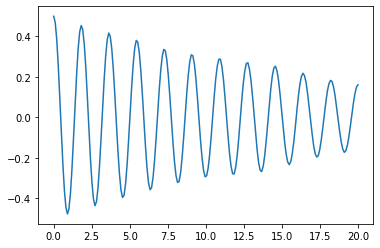

In [8]:
plt.plot(times, data.expect[0])#, times, data.expect[1])
plt.plot(ctimes,data1)#,ctimes,data2)
#plt.yscale('log')
plt.title('Protecting Nuclear Spin')

plt.xlabel('Time')
plt.ylabel('<$I_x$>')
plt.legend(("$S_z$", "$S_x$"),loc=4)
plt.tight_layout()
#plt.savefig('protection-first.png',dpi=150)
plt.show()
 